In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#functions
def conditions(s):
    if s['favorite'] == s['Opp'] + ' ':
        return True
    elif s['favorite'] == s['Home'] + ' ':
        return False
    else:
        return 2
    
def spreadcover(s):
    if s['favorite'] == s['Home'] + ' ':
        points = s['Home_Score'] - s['Away_Score']
        if points > s['spread']:
            return True
        elif points == s['spread']:
            return 'Push'
        else:
            return False
    else:
        points = s['Away_Score'] - s['Home_Score']
        if points > s['spread']:
            return True
        elif points == s['spread']:
            return 'Push'
        else:
            return False
        
def win(s):
    if s['Home_Score'] > s['Away_Score']:
        return True
    else:
        return False
        

In [3]:
master02_10 = pd.read_csv('./data/MASTER2002_2010.csv',index_col='Unnamed: 0')
master10_20 = pd.read_csv('./data/MASTER2010_2020.csv',index_col='Unnamed: 0')

In [4]:
#The two dataframs overlap in 2010 so im going to drop 2010 from master02_10
master02_10 = master02_10[master02_10.Team_Year != 2010]

In [5]:
master = pd.concat([master02_10,master10_20])
master['HomeOrAway'] = master['HomeOrAway'].astype(str)
master = master[~master.HomeOrAway.str.contains('@')]
master.drop(['PlayersURL','VegasLink','GetBoxScoreURL','Weather','BOXSCORE', 'HomeOrAway','Links'], axis=1, inplace=True)
master = master.reset_index(drop=True)

In [6]:
#breaking out lists/columns from spread and overunder
favorite = []
spread = []
for x in master['Vegas Line']:
    x = x.split('-')
    if len(x) == 1:
        favorite.append('Push')
        spread.append(0)
    else:
        favorite.append(x[0])
        spread.append(x[1])
        
OUtotal = []
OUresult = []
for x in master['Over/Under']:
    if pd.isna(x):
        OUtotal.append('NAN')
        OUresult.append('NaN')
    else:
        x = x.split('(')
        OUtotal.append(x[0])
        OUresult.append(x[1].replace(')',''))

master['spread'] = spread
master['favorite'] = favorite
master['OUtotal'] = OUtotal
master['OUresult'] = OUresult
master['HomeWin'] =  master.apply(lambda row: win(row), axis=1)

In [7]:
#creating betting df and renaming columns
betting = master[['Vegas Line','spread', 'favorite','Over/Under','OUtotal','OUresult','Team_Name','Home_Score','Opp','Away_Score','Team_Year','HomeWin']]
betting = betting.rename(columns = {'Team_Name':'Home','Team_Year':'Year','Over/Under':'Over_Under'})  

In [8]:
#change column types 
betting = betting.astype({'Vegas Line': 'str','spread':'float','favorite':'category','Over_Under':'object'})
#drop rows that have NaNs in Opp column
betting= betting[betting['Opp'].notna()]


In [9]:
# Create homeunderdog and spreadcover columns with lambda
betting['Homeunderdog'] = betting.apply(lambda row: conditions(row), axis=1)
betting['Homeunderdog'] = betting['Homeunderdog'] * 1        
betting['spreadcover'] = betting.apply(lambda row: spreadcover(row), axis=1)
betting['spreadcover'] = betting['spreadcover'] * 1
betting = betting.drop(columns=['Over_Under'])
betting['HomeWin'] = betting['HomeWin'] * 1


In [10]:
betting.head()

,Vegas Line,spread,favorite,OUtotal,OUresult,Home,Home_Score,Opp,Away_Score,Year,HomeWin,Homeunderdog,spreadcover
0,San Diego Chargers -2.5,2.5,San Diego Chargers,39.0,under,Arizona Cardinals,15.0,San Diego Chargers,23.0,2002,0,1,1
1,New York Giants -3.0,3.0,New York Giants,38.5,under,Arizona Cardinals,21.0,New York Giants,7.0,2002,1,1,0
2,Arizona Cardinals -3.5,3.5,Arizona Cardinals,NAN,NaN,Arizona Cardinals,9.0,Dallas Cowboys,6.0,2002,1,0,0
3,St. Louis Rams -5.0,5.0,St. Louis Rams,43.5,under,Arizona Cardinals,14.0,St. Louis Rams,27.0,2002,0,1,1
4,Arizona Cardinals -3.0,3.0,Arizona Cardinals,37.0,under,Arizona Cardinals,6.0,Seattle Seahawks,27.0,2002,0,0,0


In [11]:
betting.groupby(['Year']).groups.keys()


dict_keys([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [12]:
len(betting.groupby(['Year']).groups[2002])

278

In [13]:
betting.groupby('Year').first()

,Vegas Line,spread,favorite,OUtotal,OUresult,Home,Home_Score,Opp,Away_Score,HomeWin,Homeunderdog,spreadcover
Year,,,,,,,,,,,,
2002,San Diego Chargers -2.5,2.5,San Diego Chargers,39.0,under,Arizona Cardinals,15.0,San Diego Chargers,23.0,0,1,1
2003,Seattle Seahawks -5.0,5.0,Seattle Seahawks,44.5,under,Arizona Cardinals,0.0,Seattle Seahawks,38.0,0,1,1
2004,New England Patriots -8.0,8.0,New England Patriots,41.5,under,Arizona Cardinals,12.0,New England Patriots,23.0,0,1,1
2005,St. Louis Rams -1.0,1.0,St. Louis Rams,44.0,under,Arizona Cardinals,12.0,St. Louis Rams,17.0,0,1,1
2006,Arizona Cardinals -9.5,9.5,Arizona Cardinals,44.0,over,Arizona Cardinals,34.0,San Francisco 49ers,27.0,1,0,0
2007,Seattle Seahawks -2.5,2.5,Seattle Seahawks,42.5,over,Arizona Cardinals,23.0,Seattle Seahawks,20.0,1,1,0
2008,Arizona Cardinals -2.0,2.0,Arizona Cardinals,52.0,over,Arizona Cardinals,23.0,Pittsburgh Steelers,27.0,0,0,0
2009,Green Bay Packers -2.5,2.5,Green Bay Packers,48.0,over,Arizona Cardinals,16.0,San Francisco 49ers,20.0,0,2,1
2010,Arizona Cardinals -5.5,5.5,Arizona Cardinals,39.0,over,Arizona Cardinals,24.0,Oakland Raiders,23.0,1,0,0


In [97]:
#Get the sum of home wins per year
wins = betting.groupby(['Year','Home'])['HomeWin'].sum()
homedog = betting.groupby(['Year','Home'])[['Homeunderdog']].sum()
spreadcount = betting.groupby(['Year','Home'])[['spread']].count()
wins = wins.to_frame()

In [98]:
# wins = wins.unstack(level=0)
wins = wins.unstack(level=0)
wins.columns = wins.columns.get_level_values(1)
# level = wins.columns.get_level_values(1).astype(str)
# wins.columns = [x.replace("', '","_") for x in wins.columns]
# wins
# fg = sns.barplot(x='Year',y='HomeWin', col = 'Home', data = wins, kind = 'bar')
# fg.set_xlabes('')

In [99]:
s1 = wins[2010]
s2 = wins[2011]
s3 = wins[2012]
s4 = wins[2013]
s5 = wins[2014]
s6 = wins[2015]
s7 = wins[2016]
s8 = wins[2017]
s9 = wins[2018]
s10 = wins[2019]

wins = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10], axis=1).reset_index()
# sns.lineplot(data=wins)
# plt.figure(figsize=(900,900))
# wins.unstack(level=0).plot(kind='bar', subplots=True)

,Home,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Arizona Cardinals,4.0,5.0,3.0,6.0,8.0,7.0,4.0,5.0,1.0,2.0
1,Atlanta Falcons,7.0,6.0,8.0,3.0,3.0,4.0,7.0,5.0,4.0,NaN
2,Baltimore Ravens,7.0,9.0,10.0,6.0,6.0,2.0,6.0,5.0,4.0,7.0
3,Buffalo Bills,2.0,4.0,4.0,4.0,5.0,5.0,4.0,7.0,4.0,NaN
4,Carolina Panthers,2.0,3.0,3.0,7.0,4.0,9.0,4.0,6.0,5.0,2.0
5,Chicago Bears,7.0,4.0,5.0,5.0,2.0,1.0,3.0,2.0,7.0,4.0
6,Cincinnati Bengals,3.0,4.0,4.0,7.0,5.0,4.0,4.0,4.0,4.0,2.0
7,Cleveland Browns,3.0,2.0,4.0,3.0,4.0,2.0,1.0,0.0,5.0,4.0
8,Dallas Cowboys,2.0,4.0,4.0,5.0,5.0,1.0,7.0,3.0,8.0,5.0
9,Denver Broncos,3.0,2.0,8.0,4.0,3.0,1.0,1.0,2.0,1.0,4.0


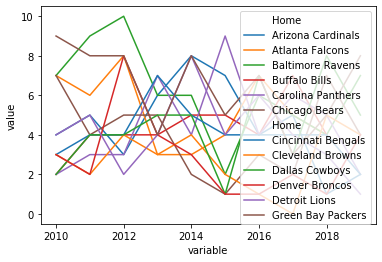

In [123]:
wins1 = wins.iloc[0:6]
wins2 = wins.iloc[6:12]
wins3 = wins.iloc[12:18]
wins4 = wins.iloc[18:25]
wins5 = wins.iloc[25:]



sns.lineplot(x='variable', y='value', hue='Home',data=pd.melt(wins1, ['Home']))


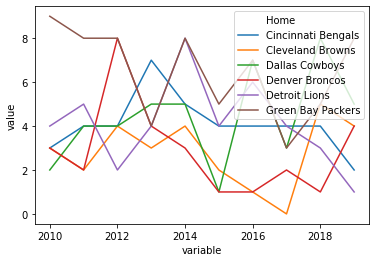

In [124]:
sns.lineplot(x='variable', y='value', hue='Home',data=pd.melt(wins2, ['Home']))

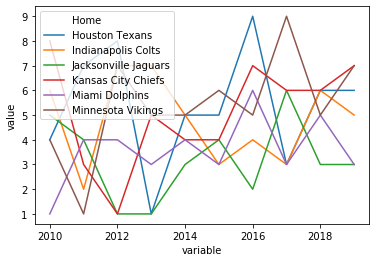

In [125]:
sns.lineplot(x='variable', y='value', hue='Home',data=pd.melt(wins3, ['Home']))

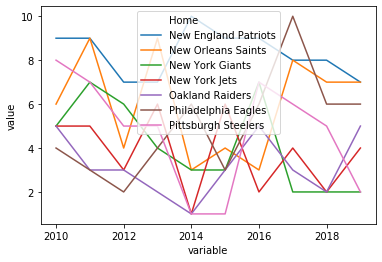

In [126]:
sns.lineplot(x='variable', y='value', hue='Home',data=pd.melt(wins4, ['Home']))

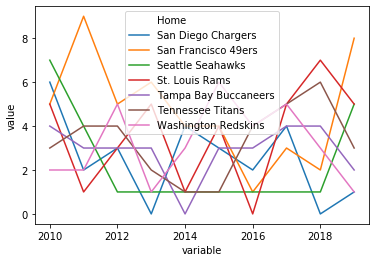

In [127]:
sns.lineplot(x='variable', y='value', hue='Home',data=pd.melt(wins5, ['Home']))

In [ ]:
homedog.hist(grid=)
plt.xlabel('underdog')
plt.ylabel("Frequency",fontsize=10)
plt.title('Home Underdog distribution')

In [ ]:
spreadcount.hist(grid=False)
plt.xlabel('spread')
plt.ylabel("Frequency",fontsize=10)
plt.title('spread Distribution')

In [ ]:
OverUnder.hist(grid=False)
plt.xlabel('')
plt.ylabel("",fontsize=10)
plt.title('')

In [ ]:
groupby.set_index('Year')[['Opp']].rename(columns={'Opp':name})

In [ ]:
#Drop bobby boucher and forest gump
homeQBTD = pd.pivot_table(master, 'Home_QB_Passing_TD', 'Home_QB_Player', 'Team_Name').sum()
homeRBTD = pd.pivot_table(master, 'H_RB1_Rushing_TD', 'H_RB1_Player', 'Team_Name').sum()
homeWRTD = pd.pivot_table(master, 'H_WR1_Receiving_TD', 'H_WR1_Player', 'Team_Name').sum()
awayQBTD = pd.pivot_table(master, 'Away_QB_Passing_TD', 'Away_QB_Player', 'Team_Name').sum()
awayRBTD = pd.pivot_table(master, 'A_RB1_Rushing_TD', 'A_RB1_Player', 'Team_Name').sum()
awayWRTD = pd.pivot_table(master, 'A_WR1_Receiving_TD', 'A_WR1_Player', 'Team_Name').sum()
homeRBTD = pd.pivot_table(master, 'H_RB1_Rushing_TD', 'H_RB1_Player', 'Team_Name').sum()

# awayRBTD = pd.pivot_table(master, 'A_RB1_Rushing_TD', 'Team_Name','A_RB1_Player').sum()






In [ ]:
master['W_L'].value_counts()

In [ ]:
master['WL'] = master['W_L'].replace({'W':1,'T':0,'L':-1})
master['HomeWin'] = master['W_L'] == 'W'
master['HomeLost'] = master['W_L'] == 'L'
master['HomeTie'] = master['W_L'] == 'T'

master['HomeWin'] = master['HomeWin']*1
master['HomeLost'] = master['HomeLost']*1
master['HomeTie'] = master['HomeTie']*1


In [ ]:

TotalWins = master.groupby('Team_Name', as_index=False).agg({"HomeWin": "sum"})
TotalLoses = master.groupby('Team_Name', as_index=False).agg({"HomeLost": "sum"})
Total = pd.merge(TotalWins, TotalLoses, left_on='Team_Name', right_on='Team_Name')
Total
Total['WinPrecent'] = (Total['HomeWin']/(Total['HomeWin']+Total['HomeLost'])) * 100


In [ ]:
betting.head()

# bettinghead.to_csv(r'./data/betting.csv', encoding='utf-8', header='true')

In [ ]:
fav = betting['favorite'].value_counts()
type(fav)

In [ ]:
invYr = invoices.groupby(['FinYear']).sum()[['Amount']]


In [ ]:
homeWRTD.hist(bins=25, grid=False, xlabelsize=10, ylabelsize=10, label='HOME')
awayWRTD.hist(bins=25, grid=False, xlabelsize=10, ylabelsize=10, label='AWAY')
plt.xlabel('WR Touchdowns')
plt.ylabel("Frequency",fontsize=10)
plt.xlim([0,75])

In [ ]:
test = homeWRTD.to_frame('columnName')
test

In [ ]:

df1 = homeWkeys
df2 = awayWRTD

f, ax = plt.subplots(1, 1)
x_col='WR TouchDowns'
y_col = 'Frequency'

ax.plot_date(df1[0], df1, color="blue", label="A", linestyle="-")
ax.plot_date(df2.date, df2, color="red", label="B", linestyle="-")


ax.legend()

plt.hist().autofmt_xdate()
plt.show()

In [ ]:
# Team Home wins by team over all years
HomeWins = master['W_L'].groupby(master['Team_Name']).describe().sort_values(by='count', ascending=False)
AwayWins = master['W_L'].groupby(master['Home_QB_Player']).describe().sort_values(by='count', ascending=False)
group = master['W_L'].groupby([master['Team_Name'],master['Team_Year']]).count()


In [ ]:
master.info()

In [ ]:
col = [x for x in master.columns]
col

In [ ]:
master = pd.read_csv('./data/MASTER2002_2010.csv',index_col='Unnamed: 0')
test = master[-1:]

In [ ]:
col = [x for x in master.columns]
ou = test['Home_Score'] + test['Away_Score']

In [ ]:
# print(test['Home_Score'],test['Away_Score'], )
print(f"Home Score {test['Home_Score']}, Away Score {test['Away_Score']} for a total of {ou} and the overunder was {test['Over/Under']}")


In [ ]:
col
dropcols = ('PlayersURL','VegasLink','GetBoxScoreURL','Weather')

In [ ]:
# 2002-2005  06-20
#madden ranking

html = get(url)
soup = Soup(html)
dfstats = pd.read_html(str(soup.find('table')[2]))[0]